# **Assignment 10**

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
# additional
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#plotly or other graphing library

In [2]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()

# boston = ds.load_boston()
# The Boston dataset is no longer available in sklearn, see here: 
# https://github.com/amueller/introduction_to_ml_with_python/issues/171.
# Instead, I'll use another dataset with a continuous target variable: diabetes.
# I'll follow the instructions below as closely as possible,
# substituting variables where appropriate.

diabetes = ds.load_diabetes()

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target, name = 'iris_type')

In [5]:
display(X.head(), y.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
Name: iris_type, dtype: int32

In [6]:
display(X.describe(), y.value_counts())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


iris_type
0    50
1    50
2    50
Name: count, dtype: int64

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [7]:
knn = KNN(n_neighbors = 5)
knn.fit(X, y)

new_observations = pd.DataFrame(iris.data, columns = iris.feature_names)
predictions = knn.predict(new_observations)

conversion_dict = {key: value for key, value in enumerate(iris.target_names)}
predictions_labels = pd.Series([conversion_dict[x] for x in predictions])

print('Count of Predictions per Class')
display(predictions_labels.value_counts())
print('Classification Report')
print(classification_report(iris.target, predictions))

Count of Predictions per Class


virginica     51
setosa        50
versicolor    49
Name: count, dtype: int64

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [8]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

knn = KNN(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report', classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [9]:
results = pd.DataFrame()

for n in range(1, 31):
    knn = KNN(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    result = pd.DataFrame({'n': n, 'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test}, index = [0])
    results = pd.concat([results, result], ignore_index = True)

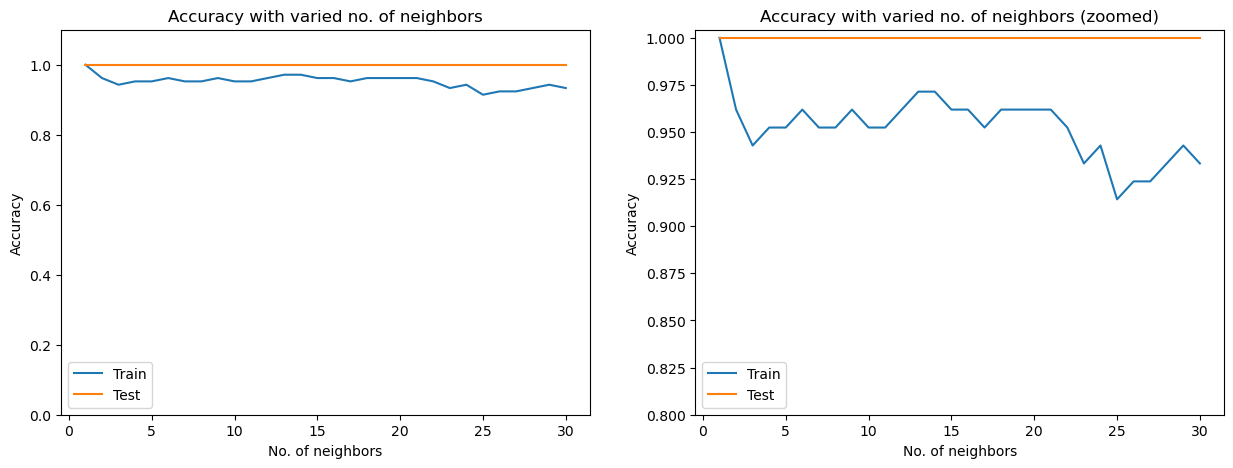

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(results.n, results.accuracy_train)
ax[0].plot(results.n, results.accuracy_test)
ax[0].set_xlabel('No. of neighbors')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy with varied no. of neighbors')
ax[0].set_ylim(0, 1.1)
ax[0].legend(['Train', 'Test'])

ax[1].plot(results.n, results.accuracy_train)
ax[1].plot(results.n, results.accuracy_test)
ax[1].set_xlabel('No. of neighbors')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy with varied no. of neighbors (zoomed)')
ax[1].set_ylim(0.8)
ax[1].legend(['Train', 'Test'])

plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [11]:
print(
    diabetes.keys(),'\n',
    diabetes.feature_names,
    diabetes.DESCR
)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']) 
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density 

In [12]:
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = pd.Series(diabetes.target, name = 'disease_progression')

# Note that all features are mean centered on 0 and scaled
print(
    f'Mean age: {round(X.age.mean(), 5)}\n'
    f'Mean disease progression: {round(y.mean(), 5)}'
)

Mean age: -0.0
Mean disease progression: 152.13348


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

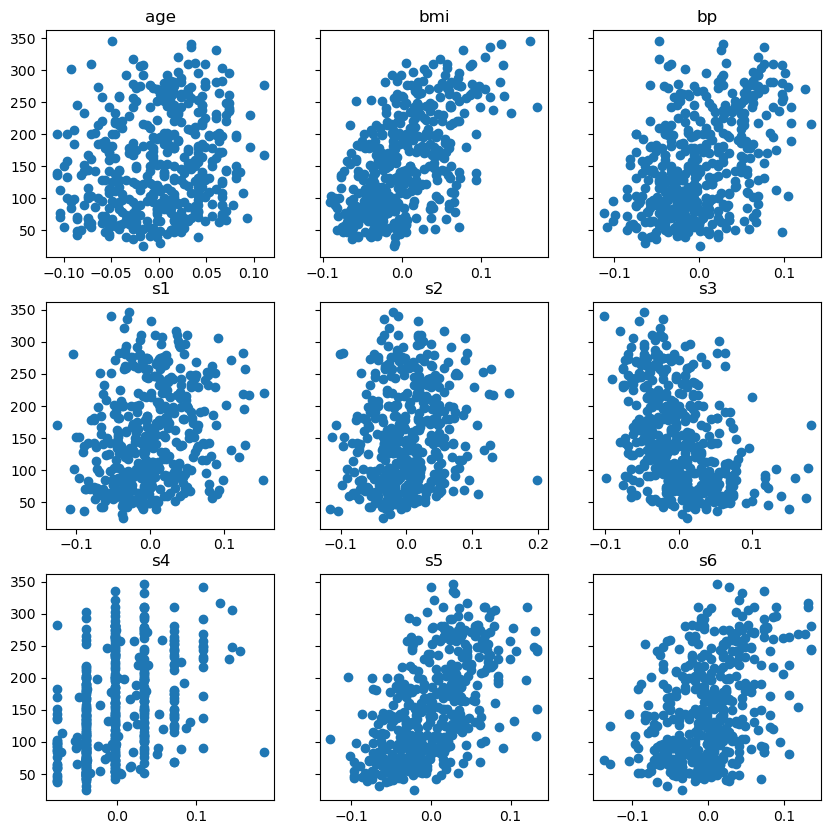

In [13]:
fig, axes = plt.subplots(3, 3, figsize = (10, 10), sharey = True)

numerical_features = [x for x in diabetes.feature_names if x != 'sex']

for ax, feature in zip(axes.ravel(), numerical_features):
    ax.scatter(X[feature], y)
    ax.set_title(feature)

plt.show()

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

In [14]:
model = lm.LinearRegression()
model.fit(X.bmi.values.reshape(-1, 1), y)

X_test = np.linspace(start = X.bmi.min(), stop = X.bmi.max(), num = 100).reshape(-1, 1)
y_pred = model.predict(X_test)

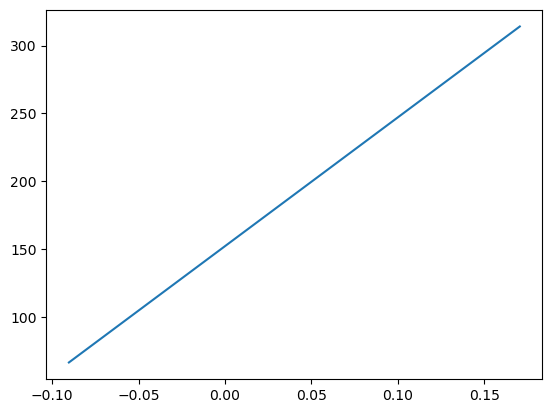

In [15]:
fig, ax = plt.subplots()

ax.plot(X_test, y_pred)

plt.show()